# Implementing ID3 Decision Tree Model to Determine Car Evaluation Classification



*   Author: Robin Collis
*   Date: 18 July 2021
*   Program: UTS Machine Learning Foundations
*   Project Link: https://colab.research.google.com/drive/16A0gxq0UBZl344u7jvucND2VvM1WhXXy?usp=sharing



# Decision Tree Overview

## Alogorithm Overview

Decision trees are supervised learning algorithms used for both regression and classification tasks, using a structure that includes a root node, branches, and leaf nodes. The starting node in the tree is designated the root node. Each internal node denotes a test on an attribute with each branch being the outcome of a test, and each leaf node resulting in a class label. [1]

A decision tree operates by determining the descriptive features in a dataset that contain the most 'information' for correctly classifying the target variable. The tree is split on the dataset such that the resulting sub-dataset within the branch are as pure as possible; the descriptive feature which leaves the target feature most purely is said to be the most informative one [2]. The process is occurs recursively in a manner called recursive partitioning

For a decision tree model to operate, the feautres must be categorical. [1]

The key attributes of a decision tree are as follows [1]:

*  **Root Node:** This represents the entire sample dataset that is subsequently droken down into two or more data sets 
*  **Decision Node:** This is a sub-node that is split into further nodes
*  **Terminal Node:** Nodes that do not split and result in the final outcome of the decision making process
*  **Splitting:** The process in which nodes are split into sub-nodes


The benefits of a decision tree is that the flowchart-like structure is visualised in a manner which is easily interpreted and thus aids with verificaiton and decision making. In addition, the algorithms use internal decision making logic and are not closed 'black' box solutions such as neural networks. In addition, calculation time is generally faster, with the time complexity of decision trees being a function of the number of records and number of attributes in the given data [5]

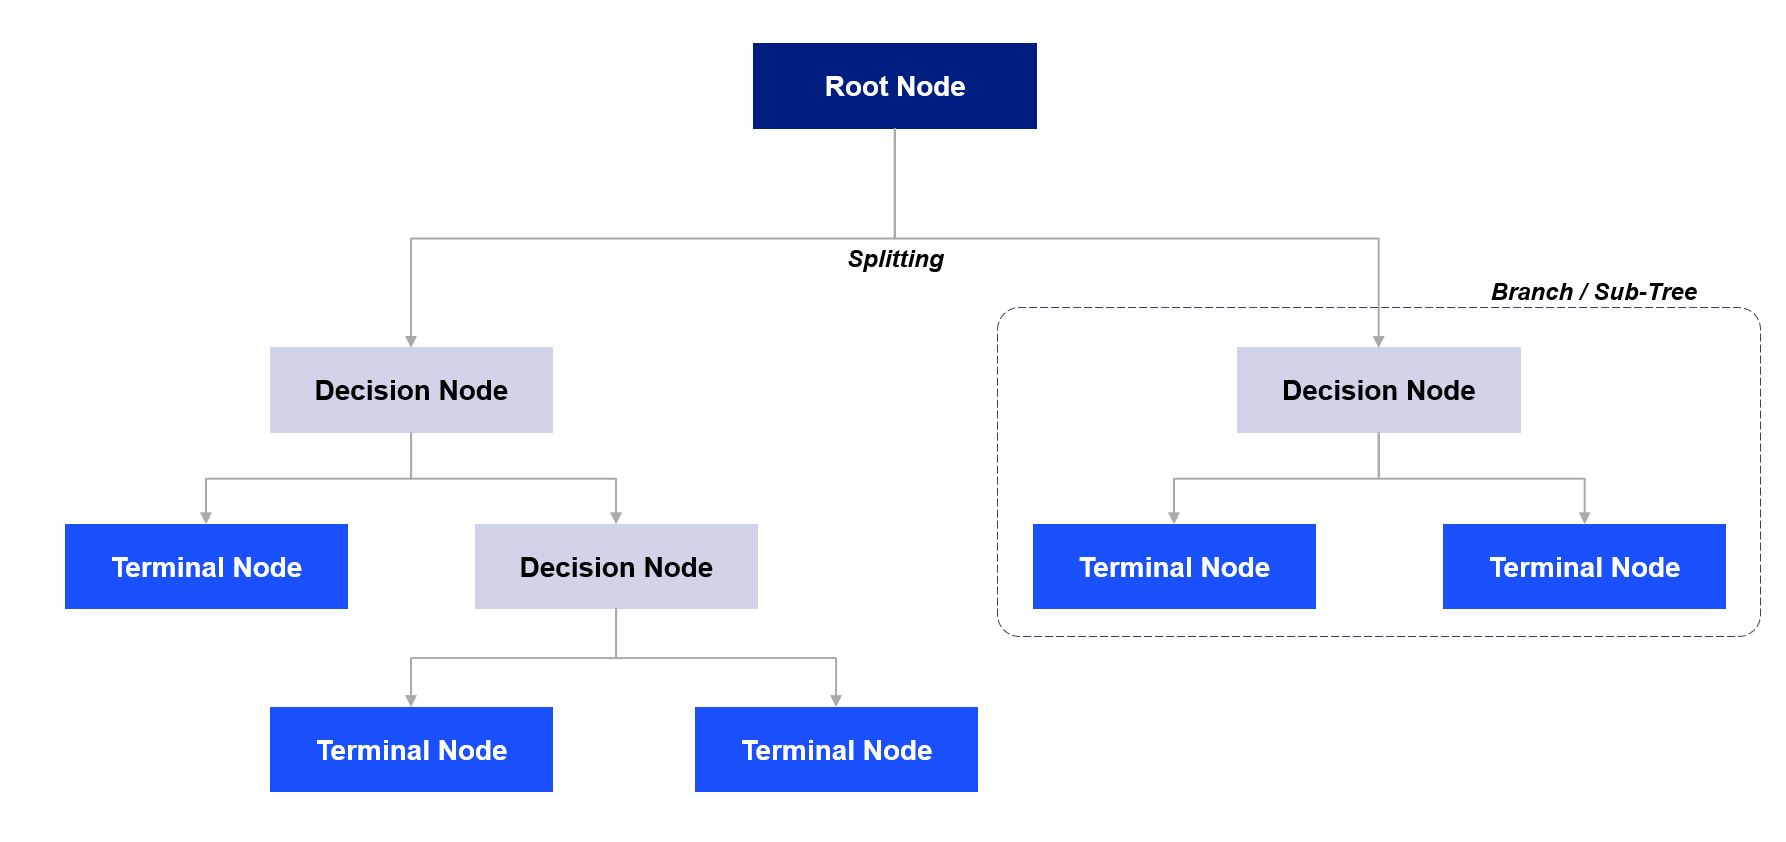

Ultimately the Decision Tree algorithm forms a root node based onthe dataset; one then works their way down the tree by following the corresponding node that meets our condition or decision until a leaf node is reached that contains the prediction or the outcome of the Decision Tree.

The overall process dates the original dataset and splits into a training and test data set, typically using a 70/30 split. The training data set is fed into the selected decision tree algorithm, splitting the records based on assessing the descriptive features in the dataset for the most 'information'. This process is repeated until there are no more records or instances. The decision tree model is then validated on the test data set by assessing how well it can predict the target variable on the dataset that has been with held [5]

There are a number of methods for splitting datasets, being Information Gain, Gain Ratio or Gini Index.

ID3 algorithm, standing for Iterative Dichotomiser 3, is a classification algorithm that follows a greedy approach of building a decision tree by selecting a best attribute that yields maximum Information Gain (IG) or minimum Entropy (H) [6]

Gini index measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. It favors larger partitions and is simple to implement, where as ID3 favours partitions that have small counts but many distinct values [7]

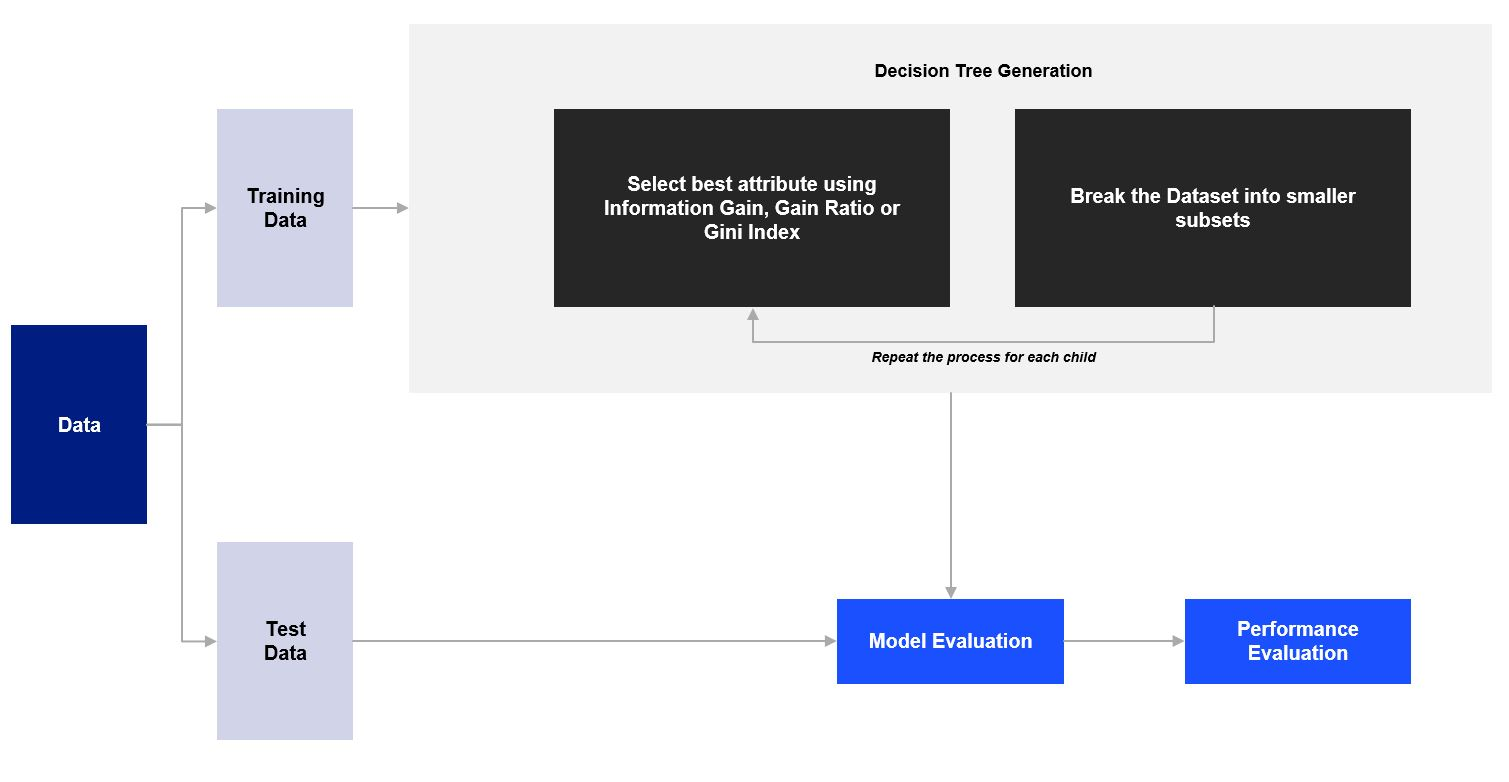

## Attribute Selection Measures

Decision Trees use the notion of 'information' to split the tree, with Information Gain being the standard measure of 'informativeness' of a feature in a dataset. 

A less impure node requires less information to describe it, where as a more impure node requires more information. 

Entropy is the measure of disorganisation in a system; information gain calculates the difference between entropy before a split and the average entropy after the split of the dataset based on given feature values.

Entropy is represented inthe following formula where P(x=k) is the probability, that the target feature takes a specific value k: [3]

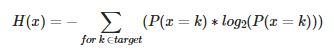

Once the entropy is determined for the total dataset, the next step required is to calculate which feature provides the best information gain, and thus which feature split the provided dataset most accurately, starting at the root node.

This is calculated by spliting the dataset along the values of each descriptive feature and calculating the entropy of the dataset post split. This is then subtracted from the total entropy of the dataset 

The information gain of a feature is calculated with: [3]

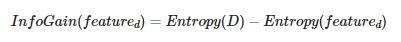

The formula for the Information Gain calculation per feature is: [3]

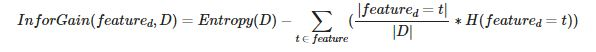

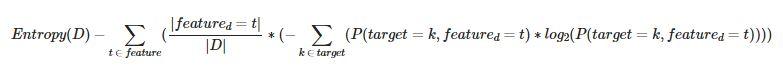

The feature with the highest information gain is chosen as the splitting attribute for the root node. The process is then subsequently repeated for the remaining features



## ID3 Algorithm

The ID3 (Iterative Dichotomiser) Decision Tree algorithm is one method commonly used to calculate information gain in a dataset

ID3 is a simple decision tree learning algorithm developed by Ross Quinlan (1983). The basic idea of ID3 algorithm is to construct the decision tree by employing a top-down, greedy search through the given sets to test each attribute at every tree node [3]

The pseudocode for the ID3 Algorithm is based on the pseudocode illustation of Tom M. Mitchell [4]

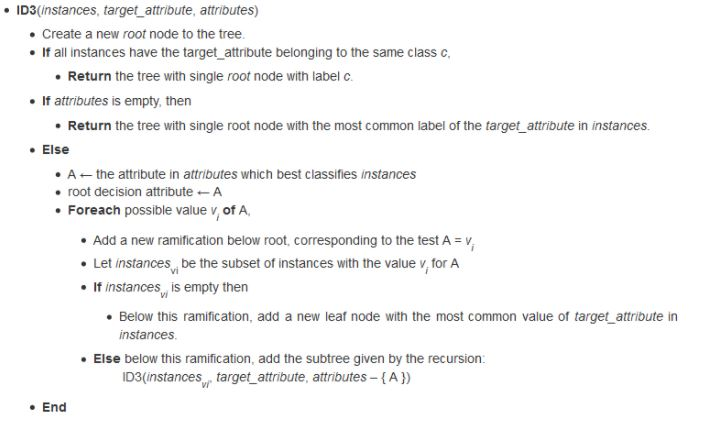

The ID3 algorithm works in the following way:



1.   Entropy of the total dataset is calculated
2.   Information Gain is calculated for each feature
3.   Assign as the Root Node the feature with the largest Information Gain
4.   Grow for each remaining feature an outgoing branch with unlabelled branches at the end
5.   Split the dataset on the remaining features with the highest Information Gain
6.  Remove this feature from the dataset
7.  Repeat steps until and end point is reached


# ID3 Decision Tree Model Exercise

## Exercise Overview

This exercise looks to leverage a Car Data Set, with the aim of using the available features to determine car evaluation



## Import Key Libraries

In [78]:
# Import key libraries

import pandas as pd
import numpy as np
from pprint import pprint

## Import Car Dataset and Explore

In [79]:
# Import the car dataset

car_data = pd.read_csv('/content/car_data.csv')

In [80]:
# View header of the car_data data set

car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class_type
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [81]:
# Explore the dataframe by viewing the dimensions

car_data.shape

(1728, 7)

In [82]:
# Check that the data set is complete (i.e. missing no variables)\

car_data.isnull().sum()

buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
class_type    0
dtype: int64

In [83]:
# View summary of data set

car_data.info

<bound method DataFrame.info of      buying  maint  doors persons lug_boot safety class_type
0     vhigh  vhigh      2       2    small    low      unacc
1     vhigh  vhigh      2       2    small    med      unacc
2     vhigh  vhigh      2       2    small   high      unacc
3     vhigh  vhigh      2       2      med    low      unacc
4     vhigh  vhigh      2       2      med    med      unacc
...     ...    ...    ...     ...      ...    ...        ...
1723    low    low  5more    more      med    med       good
1724    low    low  5more    more      med   high      vgood
1725    low    low  5more    more      big    low      unacc
1726    low    low  5more    more      big    med       good
1727    low    low  5more    more      big   high      vgood

[1728 rows x 7 columns]>

## Define Features and Target Variable

There are 7 variables in the car data set

* These are given by buying, maint, doors, persons, lug_boot, safety and class_type
* class_type is the target variable

The target class_type is made of 4 types being:

* vgood
* good
* acc
* unacc

## Entropy of Dataset

The first function is calculates the entropy across the car dataset. In this case the target column is the target variable which is "class_type"

In [84]:
# Define entropy for the target column

def entropy_calc(target_column):

    elements,counts = np.unique(target_column,return_counts = True)
    entropy_calc = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_calc

In [85]:
# Calculate the entropy of the total dataset

total_entropy = entropy_calc(car_data["class_type"])
total_entropy

1.205740970012175

In [86]:
# Validate total entropy to the dataset

# Import the excel entrop validation check worksheet

entropy_validation = pd.read_csv('/content/car_entropy_check.csv')
entropy_validation

,class_type,Count,Ratio,Log(2),Ratio x Log(2)
0,unacc,1210,0.700231,-0.514096,-0.359986
1,acc,384,0.222222,-2.169925,-0.482206
2,vgood,65,0.037616,-4.732520,-0.178017
3,good,69,0.039931,-4.646363,-0.185532
4,Total,1728,NaN,NaN,1.205741


The entropy of the dataset is 1.205, which is validated via an offline workbook which takes the count and ratio of the class_types, the log(2) of each and then calculates said ratio x log(2) for each. The total entropy is calculated to be 1.205 as per the function 

## Information Gain

The information gain of the dataset takes into account three parameters:
 

1.   **data:** The dataset for whose feature the IG should be calculated
2.   **split_attributename** The name of the feature for which the information gain should be calculated
3.   **target_featre:** The name of the target feature. The default for this example is "class"


In [87]:
# Define Information Gain

def IG(data,split_attributename,target_feature="class_type"):

    # Calculate the values and the corresponding counts for the split attribute and its weighted entropy
    vals,counts= np.unique(data[split_attributename],return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts))*entropy_calc(data.where(data[split_attributename]==vals[i]).dropna()[target_feature]) for i in range(len(vals))])
    
    # Calculate the information gain of the feature
    information_gain = total_entropy - weighted_entropy
    return information_gain

As an example, the Information Gain for the variable "doors" can be calculated as follows:

In [88]:
IG_doors = IG(car_data,"doors",target_feature="class_type")
IG_doors_summary = "The Information Gain of the variable doors is {}".format(IG_doors)
print(IG_doors_summary)

The Information Gain of the variable doors is 0.004485716626631886


The output of the Information Gain function across the complete car data set is shown below. The variable 'safety' has the highest Information Gain and would be the variable used at the Root Node

In [89]:
InforGain_summary = {k:IG(car_data,k) for k in car_data.keys()[:-1]}
InforGain_summary

{'buying': 0.09644896916961376,
 'doors': 0.004485716626631886,
 'lug_boot': 0.030008141247605202,
 'maint': 0.07370394692148574,
 'persons': 0.21966296333990798,
 'safety': 0.26218435655426375}

## ID3 Model

ID3 Algorithm utilises five parameters:
   

1.   **data:** The data for which the ID3 algorithm should be run which in the first run equals the total dataset
2.   **originaldata:** The original dataset needed to calculate the mode target feature value of the original datase
3.   **features:** The feature space of the dataset
4.  **target_attribute_name:** The name of the target attribute
5.   **parent_node_class:** This is the value of the target feature value of the parent node for a specific node


In [90]:
# Define ID3 algorithm

# Note: This code leverages an example provided at Python-Course to build from first principles: https://www.python-course.eu/Decision_Trees.php

def ID3(data,originaldata,features,target_attribute_name="class_type",parent_node_class = None):
   
# Define the stop criteria so that when satisfied will reurn a leaf node
    
    # If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    # If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data) == 0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    # If the feature space is empty, return the mode target feature value of the direct parent node                 
    elif len(features) == 0:
        return parent_node_class_type
    
# Grow tree if stop criteria not satisfied
    
    else:
        # Set the default value for this node which is the The mode target feature value of the current node
        parent_node_class_type = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        # Select from the remaining features which best splits the dataset
        item_values = [IG(data,feature,target_attribute_name) for feature in features]
        top_feature_index = np.argmax(item_values)
        top_feature = features[top_feature_index]
        
        # Create the tree structure. The root gets the name of the feature (top_feature) with the maximum information gain in the first run
        tree = {top_feature:{}}
        
        
        # Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != top_feature]
        
        # Grow a branch under the root node for each possible value of the root node feature    
        for value in np.unique(data[top_feature]):
            value = value
            # Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            sub_data = data.where(data[top_feature] == value).dropna()
            
            # Call the ID3 algorithm for each of those sub_datasets with the new parameters
            subtree = ID3(sub_data,car_data,features,target_attribute_name,parent_node_class_type)
            
            # Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[top_feature][value] = subtree
            
        return(tree)    

## Prediction

The prediction of a new query instance takes two parameters:

1.   The query instance as a dictionary of the shape
2.   The tree



In [91]:
def predict(query,tree,default = 1):
    
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

## Test and Train Dataset

The car_data set is split into train and test datasets for the features and target variable using a 60/40 allocation

In [92]:
# Define 60/40 split of car dataset
split = round(car_data.shape[0]*0.6)

# Apply split to the dataset and drop index
training_data = car_data.iloc[:split].reset_index(drop=True)
testing_data = car_data.iloc[split:].reset_index(drop=True)

In [93]:
print(f"The number of training examples in the dataset is {training_data.shape[0]}")
print(f"The number of testing examples in the dataset is {testing_data.shape[0]}")

The number of training examples in the dataset is 1037
The number of testing examples in the dataset is 691


## Test and Validate

The test function creates new query instances and converts into a dictionary. Next an empty dataframe is created to house the prediction values from the tree. Finaly the prediction accuracy is calculated 

In [94]:
def test(data,tree):
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    predicted = pd.DataFrame(columns=["predicted"]) 
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy of the model is',(np.sum(predicted["predicted"] == data["class_type"])/len(data))*100,'%')

In [95]:
tree = ID3(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'safety': {'high': {'persons': {'2': 'unacc',
                                 '4': {'maint': {'high': {'buying': {'high': 'acc',
                                                                     'med': 'acc',
                                                                     'vhigh': 'unacc'}},
                                                 'low': 'acc',
                                                 'med': 'acc',
                                                 'vhigh': {'buying': {'high': 'unacc',
                                                                      'med': 'acc',
                                                                      'vhigh': 'unacc'}}}},
                                 'more': {'maint': {'high': {'buying': {'high': {'doors': {'2': {'lug_boot': {'big': 'acc',
                                                                                                              'med': 'acc',
                                                            

The model returns a prediction accuracy of 63.67%

This could be improved by:


1.   Increasing the number of samples in the dataset
2.   Enhancing the dataset by introducing additional features



## Dedicated Decision Tree Library

As an alternative to building a decision tree from first principles, one can look to utilise dedicated software libraries to both speed up the process whilst acting as a valdiation for the ID3 build

A common library is sklearn

Note: This approach requires the features to be numerical. This can be done with the function 'category_encoders', however I could not get the function to load, and thus reverted to manually encoding the variables in a new data set car_data_encoded

In [96]:
# Import the car dataset

car_data = pd.read_csv('/content/car_data_encoded.csv')

In [97]:
from sklearn.model_selection import train_test_split

# Split car dataset into X and Y datasets by dropping / retaining the target variable 'class_type'

X = car_data.drop(['class_type'], axis=1)
Y = car_data['class_type']

# The X and Y datasets are then split into test and train splits

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = (car_data.shape[0]-split), random_state = 10)

In [98]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((1037, 6), (691, 6))

In [99]:
# Import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [100]:
# Predict the Test set results with criterion gini index

Y_pred_gini = clf_gini.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_gini)))

Model accuracy score with criterion gini index 0.8090


## Conclusion

The accuracy of the first principles ID3 algorithm is 63.67% compared to 80.9% for the sklearn DecisionTreeClassifier

There are a number of improvements that could be made across both data sets:

*   Increase the number of datapoints (rows) inthe dataset
*   Look to enhance the dataset with additional features (columns)

However, when comparing the two approaches, my conclusion is that there is an inherent error in the bottom up ID3 model. Overall I think this indicates the benefit of leveraging libraries to develop decision trees is the preferred approach, and the one taken by data scientits when implementing decision trees



# References

References used:

1.  Decision-Tree Classifier Tutorial 
    Haryana Gurugram
    https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial#4.-Decision-Tree-algorithm-intuition-
2.  Python Machine Learning Tutorial
    https://www.python-course.eu/Decision_Trees.php
3.  Decision Tree Learning Algorithm (ID3)
    https://www.cse.unsw.edu.au/~cs9417ml/DT1/decisiontreealgorithm.html
4.  Tom M. Mitchell, 1997. Machine Learning. New York, NY, USA: McGraw-Hill
5.  Datacamp. Decision Tree Classification in Python. https://www.datacamp.com/community/tutorials/decision-tree-classification-python
6.  Opengenus. Using ID3 Algorithm to build a Decision Tree to predict the weather. https://iq.opengenus.org/id3-algorithm/
7.  Learn by Marketing. https://www.learnbymarketing.com/481/decision-tree-flavors-gini-info-gain/
